In [5]:
import networkx as nx
import os
import matplotlib.pyplot as plt
import numpy as np

from collections import Counter
from sdi import sdi # custom functions for computing shannon diversity

%matplotlib inline

In [6]:
# Helper functions
def clean_host_species(species):
    if species == 'null':
        species = 'Unknown'
    if '/' in species:
        species = species.split('/')[0]
    return species

def golden_figsize(height):
    """
    Assuming height dimension is the shorter one, the width should be:
    (1 + 5**0.5)/2
    
    This function thus returns the (width, height) tuple which is
    computed to be in a golden ratio.
    """
    width = height * (1 + 5**0.5) / 2
    return (width, height)




In [7]:
# Initialize a list that stores the data
subtype_sdis = []
country_sdis = []
host_species_sdis = []
subgraph_sizes = []

for f in os.listdir('subgraph_pkl'):
    if f.split('.')[-1] == 'pkl':
        g = nx.read_gpickle('subgraph_pkl/{0}'.format(f))

        # Initialize a Counter object for subtype, country and host
        subtype_counts = Counter()
        country_counts = Counter()
        host_species_counts = Counter()

        for n, d in g.nodes(data=True):
            host_species = clean_host_species(d['host_species'])
            country = d['country']
            subtype = d['subtype']

            subtype_counts[subtype] += 1
            country_counts[country] += 1
            host_species_counts[host_species] += 1

        subtype_sdi = sdi(subtype_counts)
        country_sdi = sdi(country_counts)
        host_species_sdi = sdi(host_species_counts)
        subgraph_size = len(g.nodes())

        subtype_sdis.append(subtype_sdi)
        country_sdis.append(country_sdi)
        host_species_sdis.append(host_species_sdi)
        subgraph_sizes.append(subgraph_size)
    

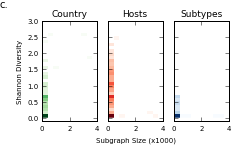

In [16]:
# Plot scatter plot of subtype, country and host species sdis by subgraph sizes
from matplotlib.colors import LogNorm 

fig = plt.figure(figsize=golden_figsize(2))

# Set alpha value
alpha = 0.2

# Other plot parameters
axisfs = 7 #axis fontsize
titlefs = 9 #title fontsize

ax1 = fig.add_subplot(131)
ax1.hist2d(subgraph_sizes, country_sdis, cmap='Greens', norm=LogNorm(), bins=[np.arange(0,4001,400), np.arange(0, 3, 0.1)])
ax1.set_ylim(-0.1, 3)
ax1.set_xticks(np.arange(0, 4001, 2000))
ax1.set_xticklabels([0, 2, 4], fontsize=7)
yticklabels = ax1.get_yticklabels()
plt.setp(yticklabels, fontsize=7)
ax1.set_title('Country', fontsize=titlefs)
ax1.set_ylabel('Shannon Diversity', fontsize=axisfs)

ax2 = fig.add_subplot(132)
ax2.hist2d(subgraph_sizes, host_species_sdis, cmap='Reds', norm=LogNorm(), bins=[np.arange(0,4001,400), np.arange(0, 3, 0.1)])
ax2.set_ylim(-0.1, 3)
ax2.set_xticks(np.arange(0, 4001, 2000))
ax2.set_xticklabels([0, 2, 4], fontsize=7)
ax2.set_yticklabels([])
ax2.set_title('Hosts', fontsize=titlefs)
ax2.set_xlabel('Subgraph Size (x1000)', fontsize=axisfs)

ax3 = fig.add_subplot(133)
ax3.hist2d(subgraph_sizes, subtype_sdis, cmap='Blues', norm=LogNorm(), bins=[np.arange(0,4001,400), np.arange(0, 3, 0.1)])
ax3.set_ylim(-0.1, 3)
ax3.set_xticks(np.arange(0, 4001, 2000))
ax3.set_xticklabels([0, 2, 4], fontsize=7)
ax3.set_yticklabels([])
ax3.set_title('Subtypes', fontsize=titlefs)

ax1.annotate('c.', xy=(0,1), ha='left', va='top', xycoords='figure fraction')

plt.subplots_adjust(bottom=0.2, right=0.95, left=0.15)
plt.savefig('Subgraph Attribute SDIs.pdf')